In [10]:
# import relevant packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels # useful stats package with regression functions
import seaborn as sns # very nice plotting package

# style settings
sns.set(color_codes=True, font_scale = 1.2)
sns.set_style("whitegrid")

In [19]:
col_list = ["weeks", "m_age","weight/pounds"]
df = pd.read_csv("births.csv", usecols=col_list) # importing three specific columns from dataset
df.head(10) # display first 10 rows of the dataset

,m_age,weeks,weight/pounds
0,30,39,6.88
1,36,39,7.69
2,35,40,8.88
3,40,40,9.00
4,37,40,7.94
5,28,40,8.25
6,35,28,1.63
7,21,35,5.50
8,20,32,2.69
9,25,40,8.75


In [20]:
df.describe()

,m_age,weeks,weight/pounds
count,150.000000,150.000000,150.00000
mean,26.600000,38.546667,7.04600
std,6.222928,2.747999,1.49721
min,15.000000,26.000000,1.63000
25%,22.000000,38.000000,6.45500
50%,25.000000,39.000000,7.31000
75%,31.000000,40.000000,8.00000
max,41.000000,44.000000,10.13000


## Significance Test

In [21]:
from scipy import stats

# given summary statistics:
r = 0.684
x = 40
y = 9 
sx = 2.747999
sy = 1.49721
n = 150

# slope
b1 = sy/sx * r
print("b1 =",b1)

# Standard Error
SE = sy/sx * ((1-r**2)/(n-2))**0.5
print("SE =",SE)

# t-value using slope and SE
t = (b1 - 0)/SE
print("t =",t)

# p-value using stats library for two-tailed test
# uses t-value and degrees of freedom (n-2)
p = (1-stats.t.cdf(t,n-2))*2
print("p =",p)

b1 = 0.3726681268806866
SE = 0.03267005578083024
t = 11.40702450527668
p = 0.0


## Pearson's Correlation

In [22]:
from scipy.stats import pearsonr
x = df["weeks"]
y = df["weight/pounds"]

r = pearsonr(x,y)[0]
print(round(r,3))

0.684


# Mutiple Regression Analyses

In [23]:
def mult_regression(column_x, column_y):
    ''' this function uses built in library functions to construct a linear 
    regression model with potentially multiple predictor variables. It outputs 
    two plots to assess the validity of the model.'''

    # It plots the single regression line if there is only one variable 
    if len(column_x)==1:
        plt.figure()
        sns.regplot(x=column_x[0], y=column_y, data=df, marker="+",fit_reg=True,color='blue')
        sns.regplot.set_title('Residuals vs Fitted values',fontweight='bold',fontsize=14)

    # define predictors X and response Y
    X = df[column_x]
    X = statsmodels.add_constant(X)
    Y = df[column_y]
    
    # Uses a library function to create a model with regression line
    global regressionmodel 
    regressionmodel = statsmodels.OLS(Y,X).fit() # OLS = "ordinary least squares"
    
    # residual plot: using comparison between residuals and fitted values and check homoscedasticity.
    plt.figure()
    residualplot = sns.residplot(x=regressionmodel.predict(), y=regressionmodel.resid, color='red')
    residualplot.set(xlabel='Fitted values for '+column_y, ylabel='Residuals')
    residualplot.set_title('Residuals vs Fitted values',fontweight='bold',fontsize=14)
    
    # QQ plot to check the normal distribution of residuals
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          weight/pounds   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     68.87
Date:                Fri, 04 Feb 2022   Prob (F-statistic):           7.87e-22
Time:                        16:12:31   Log-Likelihood:                -223.29
No. Observations:                 150   AIC:                             452.6
Df Residuals:                     147   BIC:                             461.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4714      1.359     -6.236      0.000     -11.156      -5.787
weeks          0.3812      0.033     11.715      0.000       0.317       0.445
m_age          0.0310      0.014      2.158      0.033       0.003       0.059
==============================================================================
Omnibus:                        1.716   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                1.302
Skew:                          -0.201   Prob(JB):                        0.521
Kurtosis:                       3.216   Cond. No.                         722.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

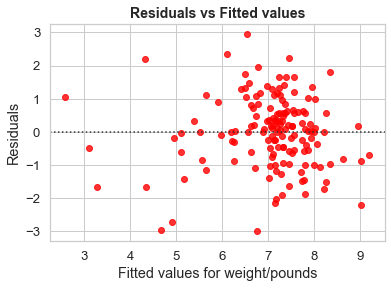

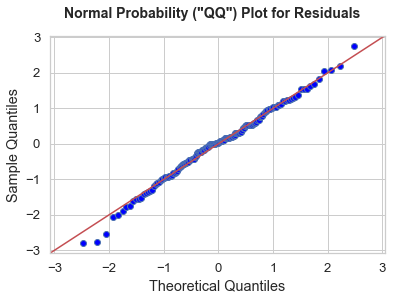

In [24]:
mult_regression(['weeks','m_age'],'weight/pounds')
regressionmodel.summary()